# Stephanie Schefer
# Project 4
##### 11/30/22
## Problem 1

Implement a neural network model for regression in the case of the air quality dataset (AirI.csv). As before, the dependent variable y is the first column, and the input variables are the rest of the columns. Consider measuring the external validity from a 5-fold cross-validation; in this exercise, you would have to implement your design of the neural network that includes experimentation with the number of layers, neurons per layer, choice of activation functions, kernel regularizations, etc. As guidance, you would know that your model is doing reasonably well if the external validity (average MSE on the test sets) is less than 0.29.
 
 


In [25]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')

In [26]:
# if we take steps to build a neural network, we need to import more libraries
# scale or not to scale the data?
  # we need to scale the data becasue we are using regression which does arithmatic on the data

# we need a scalar and the libraries to build a neural network
from sklearn.preprocessing import StandardScaler
# we need a k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse # can also use R^2 here
from sklearn.ensemble import RandomForestRegressor

# we need Keras/Tensorflow libraries for neural networks
# this is a minimal list of needed functions from Keras/Tensorflow
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.layers import LeakyReLU, ReLU
from keras.regularizers import l1, l2, l1_l2 # changes the way the weights are evaluated. l2 uses ridge regression
#from keras.utils.vis_utils import plot_model

In [27]:
airl_data = pd.read_csv('/content/drive/MyDrive/School/Applied_Machine_Learning/Assignments/Midterm/AirI.csv',header=None)

In [ ]:
airl_data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,3.4482,0.001314,0.15747,0.68830,0.152920,0.0,0.0,0.096603,0.52135,0.38205,...,-2.9459,0.219960,-0.69045,0.24044,-0.258640,1.33870,0.114820,-0.43046,0.82309,1.54350
1,3.3019,0.188490,0.55319,0.25829,0.000031,0.0,0.0,0.039008,0.43211,0.52716,...,-0.2268,-0.428570,0.74992,-0.11192,1.583000,0.88565,-0.053227,0.67796,-1.72010,-0.55051
2,2.2894,0.052169,0.43852,0.49403,0.015282,0.0,0.0,0.000000,0.00000,0.39484,...,1.1579,0.010118,0.73593,1.35600,0.057821,-1.44140,1.581800,1.25420,1.02540,-1.01890


In [ ]:
# to avoid errors, make sure x an dy are numpy arrays by extracting values from the df

x = airl_data.loc[:,'1':].values
y = airl_data.loc[:,0].values

In [ ]:
scale = StandardScaler()

In [ ]:
# define kfold cross validation to use to train the model

kf = KFold(n_splits=5,shuffle=True,random_state=123)

In [ ]:
# program cross validation loop
# if you define a model outside of the for loop, the weights will not be reinitialized each time
# set model inside the loop

PE =[] # prediction error, external validation
scale = StandardScaler()

for idxtrain, idxtest in kf.split(x):
  # we need to subdivide the train and test data into xtrain y train, xtest ytest and scale the data
  # we need to transform the test x based on the the transformation found in the train data
  xtrain = scale.fit_transform(x[idxtrain])
  xtest = scale.transform(x[idxtest])
  # do not scale y
  ytrain = y[idxtrain]
  ytest = y[idxtest]

  # DESIGN A NEURAL NETWORK MODEL
  # compile the model against an optimizer that updates the weights with backpropogation (computing gradient of each weight)
  model = Sequential()
  model.add(Dense(x.shape[1], activation=LeakyReLU(.1),use_bias=True,input_dim=x.shape[1],kernel_regularizer=l2(.01))) # num of neurons, activation type, use bias is if we use an intercept or not, imput_dim=number of input features of the x data 
  # adding the kernel regulizer changes the way weights are evaluated to be ridge regression
  # add second activation layer
  model.add(Dense(x.shape[1], activation=LeakyReLU(.01),use_bias=True,kernel_regularizer=l2(.01))) # can try to use gelu also # the .01 in this case makes leaky more critical to get to a better result
  # add output layer
  model.add(Dense(1,activation='linear')) # output has one layer because we are predicting one number
  # WHAT IS A GOOD NUMBER OF NEURONS? start with num of input features
  # number of neurons as the number of input features. can count or use shape
  # activation options: LeakyReLU(0.01), relu, gelu

  # update the weights by backpropagation
  # we can have a small learning rate because we can always increase the number of epochs
  opt = Adam(learning_rate=0.001) # make sure we choose an optimizer for the updating the weights via backpropagation
  #opt = SGD(learning_rate=0.01) # I tried SGD as well but found Adam to work here as well
  model.compile(loss='mse',optimizer=opt)# we created a neural network but we have to train it

  # fit the model
  model.fit(xtrain,ytrain,epochs=2000,verbose=0,batch_size=np.int(xtrain.shape[0]/16)) #batch size is based on size. in this case half (based on shape of x train, so we want some fraction of number of observations)# epochs is how often you shuffle 
  # general rule is a small batch size but this is not necessarily the case here
  # predict the model
  yhat_test = model.predict(xtest)
  mse_test = mse(ytest,yhat_test)
  print(mse_test) # print interval values so I can check if model is running well or not
  PE.append(mse_test)

print('The external validation of the network is: ' + str(np.mean(PE)))

### GENERAL IMPROVEMENT PRINCIPLES ####
# to imporve
# increase epochs, decrease batch size by diving by larger number # twice the size
# next try to increase the number of neurons (double)
# add another layer with an activation function

1/1 [==============================] - 0s 438ms/step
0.28264083723037675
1/1 [==============================] - 0s 45ms/step
0.17073949103811567
1/1 [==============================] - 0s 45ms/step
0.2154905061908471
1/1 [==============================] - 0s 45ms/step
0.4583792529562054


1/1 [==============================] - 0s 47ms/step
0.1940360562117477
The external validation of the network is: 0.2642572287254585


## Problem 2

Based on the class examples, design and implement a convolutional neural network model for classification in the case of the MNIST dataset and measure the validity in the test sets. The average accuracy on the test sets is expected to be at least 99%.

In [ ]:
# I used the virtual class as a reference guide for this code

In [28]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [29]:
# KERAS & TENSORFLOW LIBRARIES
import tensorflow as tf

# example of loading the mnist dataset
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder # used for multiclass classification
# here we get close to the original format of MNIST this is 28x28 pixels for each image
from keras.datasets import mnist # mechanical recognition of handwritten address digits
from keras.models import Sequential # most of the time we design a "sequence" of layers
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
#from __future__ import print_function
import numpy as np
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator # to create realistic geometrical deformations of the images
from tensorflow.keras.utils import to_categorical # this does the same as OneHotEncoder
# we import a lot of network design specific functions that we may need
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import LeakyReLU, ReLU
from keras.regularizers import l1,l2,l1_l2 #lasso, ridge, elastic net in that order
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import os
from tensorflow.python.framework import ops

In [30]:
# load dataset - this is a different version of MNIST compared to sklearn
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [35]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

## IMPORTANT !!!
 
# This is the Design of the Convolutional Neural Network model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(28, 28, 1)))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=(2, 2))) # for downsizing the info from the features a bit
  model.add(Dropout(0.25)) # to prevent having dead neurons
  model.add(Conv2D(64, kernel_size=(3, 3)))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(200))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dense(10, activation='softmax'))
  opt = Adam(learning_rate=0.002)
  model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
  return model


# evaluate a model using stratified k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=10):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = StratifiedKFold(n_folds, shuffle=True, random_state=1234)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX,trainy):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=20, batch_size=50, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories, model
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
		plt.tight_layout(pad=3.0)
	plt.show()
 
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()
 
# run the test harness for evaluating a model
def run_everything_again():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories, model = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)
 

> 99.283
> 99.067
> 99.167
> 98.983
> 99.000
> 99.033
> 99.283
> 99.033
> 98.933
> 98.917


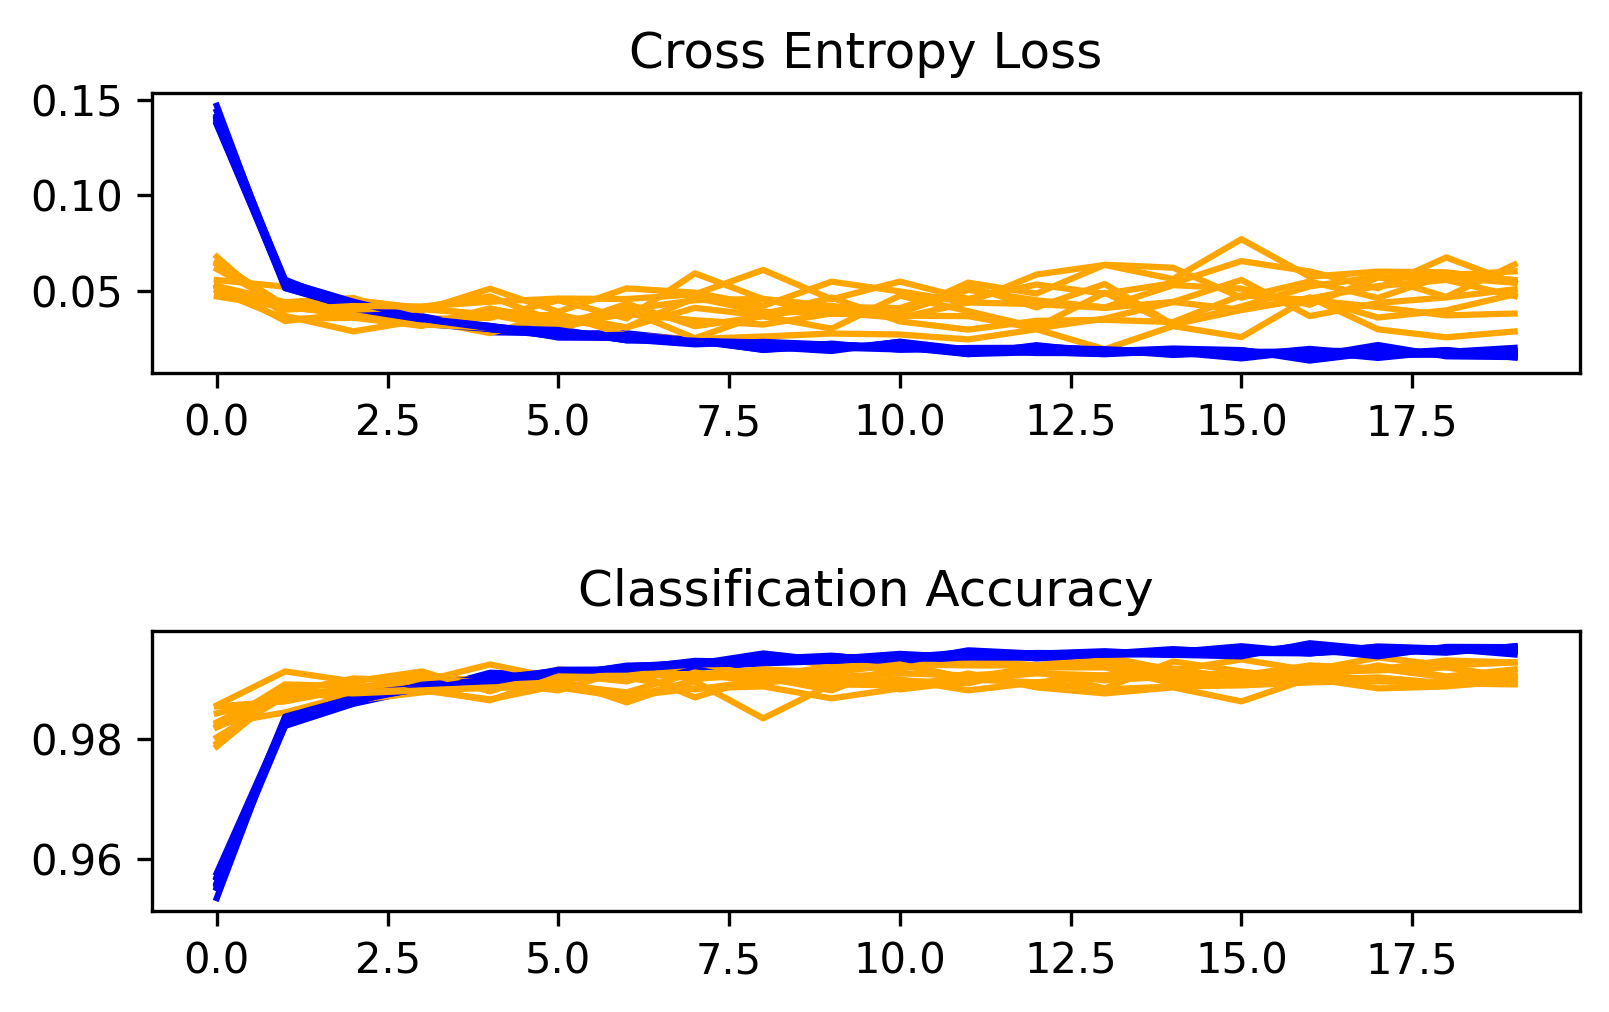

Accuracy: mean=99.070 std=0.126, n=10


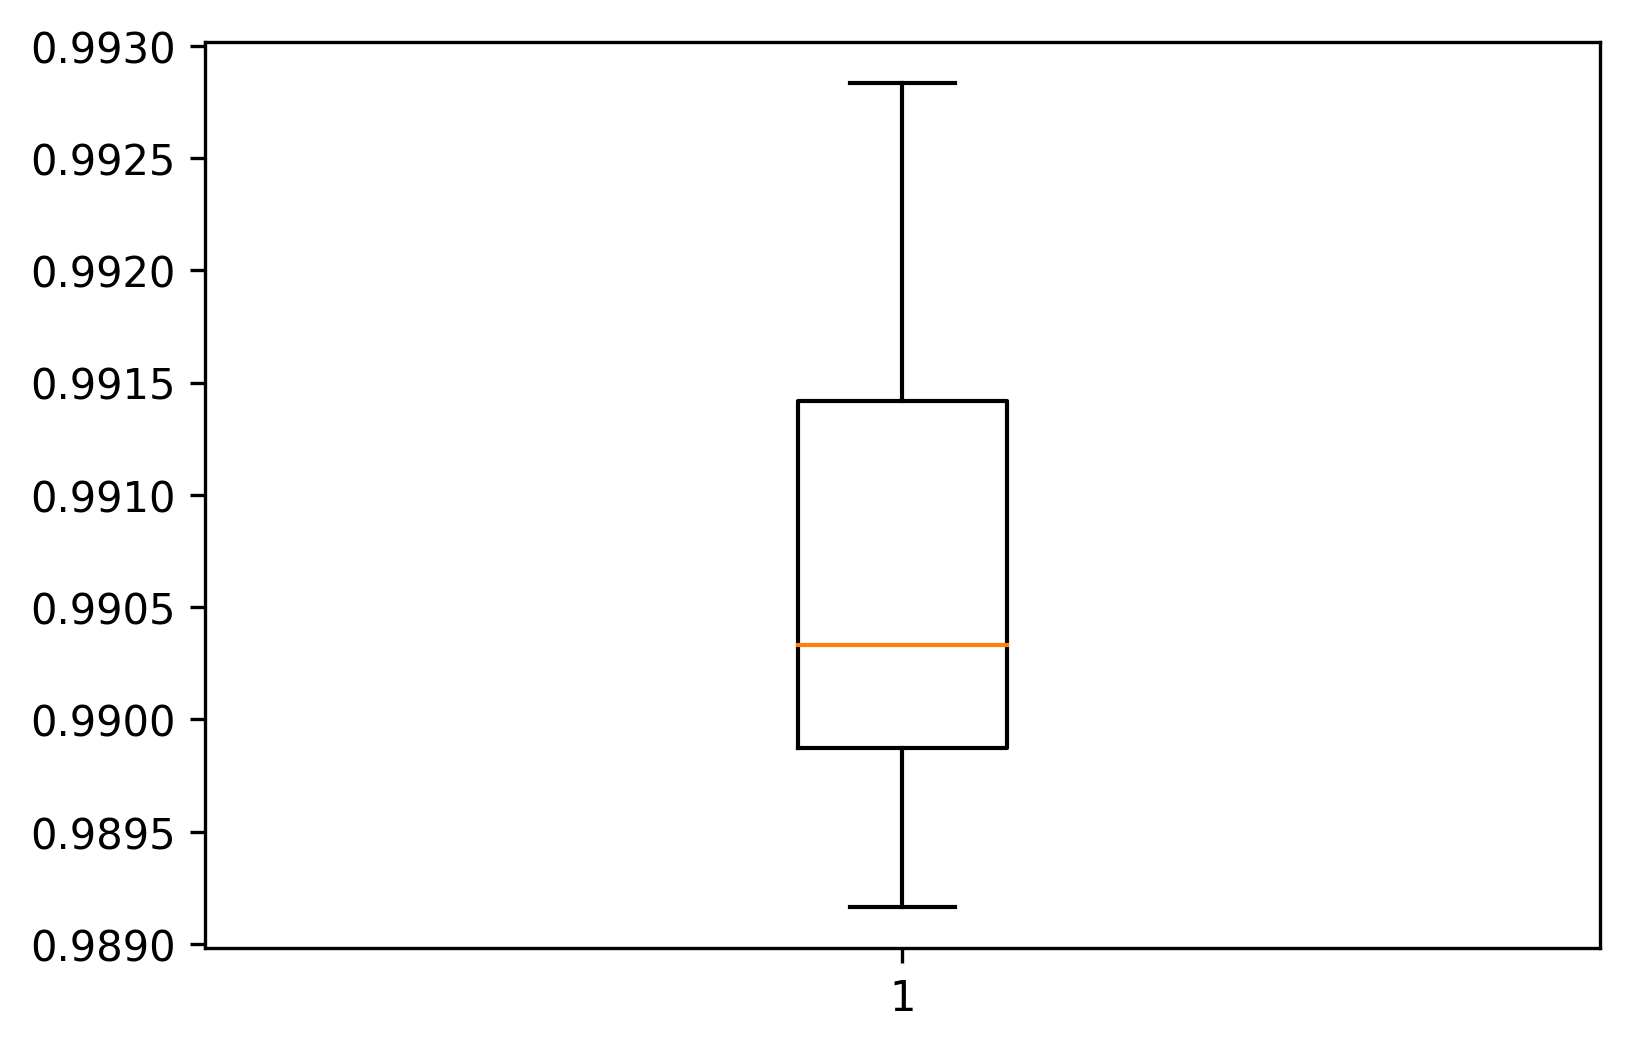

In [37]:
run_everything_again() # I changed the n_folds to be 10 to get a better accuracy score